# introduction

Does sklearn gpr fit work if you give duplicate data i.e. different y-value but same x-value.

Is this a good way to supply the variability of the data instead of changing the noise scale?

In [20]:
import numpy as np

In [21]:
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close()
plt.rcParams.update({'font.size':16})

<Figure size 432x288 with 0 Axes>

In [22]:
# generate data

In [23]:
def generate_data():
    seed=3
    N_var = 5
    N_fixed = 3
    sigma = 0.5
    # sigma = 1
    np.random.seed(seed)
    # x0 = np.random.uniform(0, 10, N_var)
    x0 = np.array([1, 4, 8, 10, 18])
    
    y0 = x0.copy() + np.random.normal(0, sigma, x0.shape)

    np.random.seed(seed)
    # x2 = np.random.uniform(0, 10, N_fixed)
    x2 = np.concatenate((x0, np.array([2,3,20])))
    y2 = x2.copy()
    
    x = np.concatenate((x0, x2))
    y = np.concatenate((y0, y2))
    
    x_test = np.linspace(0, 30, 100)[:,np.newaxis]
    
    return np.around(x, 3)[:,np.newaxis], np.around(y, 3)[:,np.newaxis], x_test

In [24]:
x, y, x_test = generate_data()

In [25]:
# mask = (x > 4) & (x < 6)
# x = x[~mask][:,np.newaxis]
# y = y[~mask][:,np.newaxis]

In [26]:
x.shape

(13, 1)

In [27]:
y.shape

(13, 1)

In [28]:
plt.plot(x, y, 'o')

In [29]:
import pandas as pd

In [30]:
df = pd.DataFrame({'x':x[:,0], 'y':y[:,0]})

In [31]:
means_df = df.groupby(by='x').mean()
stds_df = df.groupby(by='x').std()

In [32]:
stds = stds_df.values[:,0]

In [33]:
# median_value_std_estimate = np.median(np.nan_to_num(stds))
# median_value_std_estimate

In [34]:
median_value_std_estimate = np.median(stds[~np.isnan(stds)])
median_value_std_estimate

0.15414927829866734

In [35]:
impute_std = median_value_std_estimate #**2 # not sure if i should square this or not?
# impute_std = 0.001
# impute_std = 0.01
# impute_std = 0.1

In [36]:
stds[np.isnan(stds)] = impute_std

In [37]:
stds

array([0.63215346, 0.15414928, 0.15414928, 0.15414928, 0.03394113,
       0.65902352, 0.09828784, 0.15414928])

In [38]:
stds_merged = pd.merge(df, stds_df, left_on='x', right_index=True)

stds_merged = pd.merge(stds_merged, means_df, left_on='x', right_index=True)

stds_merged = stds_merged.rename(columns={'y':'y_mean'})

x_1 = stds_merged['x'].values
y_1 = stds_merged['y_x'].values

stds_vals = stds_merged['y_y'].values

In [39]:
stds_merged

x     y_x       y_y   y_mean
0    1   1.894  0.632153   1.4470
5    1   1.000  0.632153   1.4470
1    4   4.218  0.154149   4.1090
6    4   4.000  0.154149   4.1090
2    8   8.048  0.033941   8.0240
7    8   8.000  0.033941   8.0240
3   10   9.068  0.659024   9.5340
8   10  10.000  0.659024   9.5340
4   18  17.861  0.098288  17.9305
9   18  18.000  0.098288  17.9305
10   2   2.000  0.154149   2.0000
11   3   3.000  0.154149   3.0000
12  20  20.000  0.154149  20.0000

In [40]:
x_1

array([ 1,  1,  4,  4,  8,  8, 10, 10, 18, 18,  2,  3, 20])

In [41]:
y_1

array([ 1.894,  1.   ,  4.218,  4.   ,  8.048,  8.   ,  9.068, 10.   ,
       17.861, 18.   ,  2.   ,  3.   , 20.   ])

In [42]:
stds_vals

array([0.63215346, 0.63215346, 0.15414928, 0.15414928, 0.03394113,
       0.03394113, 0.65902352, 0.65902352, 0.09828784, 0.09828784,
       0.15414928, 0.15414928, 0.15414928])

In [43]:
plt.errorbar(x_1, y_1, yerr=stds_vals, fmt='o', linestyle='')

<ErrorbarContainer object of 3 artists>

In [44]:
# using mean as the y value
plt.errorbar(x_1, stds_merged['y_mean'], yerr=stds_vals, fmt='o', linestyle='')


<ErrorbarContainer object of 3 artists>

In [45]:
stds_merged

x     y_x       y_y   y_mean
0    1   1.894  0.632153   1.4470
5    1   1.000  0.632153   1.4470
1    4   4.218  0.154149   4.1090
6    4   4.000  0.154149   4.1090
2    8   8.048  0.033941   8.0240
7    8   8.000  0.033941   8.0240
3   10   9.068  0.659024   9.5340
8   10  10.000  0.659024   9.5340
4   18  17.861  0.098288  17.9305
9   18  18.000  0.098288  17.9305
10   2   2.000  0.154149   2.0000
11   3   3.000  0.154149   3.0000
12  20  20.000  0.154149  20.0000

In [46]:
stds_merged = stds_merged[~stds_merged.duplicated(subset=['x'])]

In [47]:
x_ = stds_merged['x'].values[:,np.newaxis]
# y_ = stds_merged['y_x'].values[:, np.newaxis]
y_ = stds_merged['y_mean'].values[:, np.newaxis]
# stds_ = stds_merged['y_y'].values
stds_ = stds_merged['y_y'].values

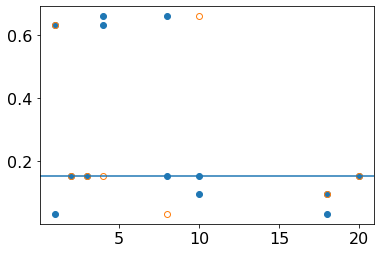

In [48]:
plt.plot(x, stds_vals, 'o')

plt.plot(x_, stds_, 'o', mfc='none')

plt.axhline(impute_std)

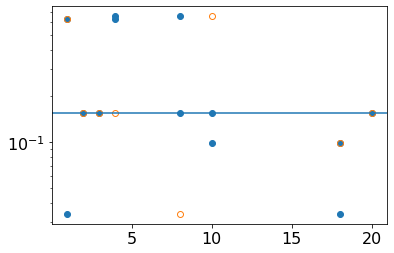

In [49]:
plt.plot(x, stds_vals, 'o')

plt.plot(x_, stds_, 'o', mfc='none')

plt.axhline(impute_std)
plt.yscale('log')

<ErrorbarContainer object of 3 artists>

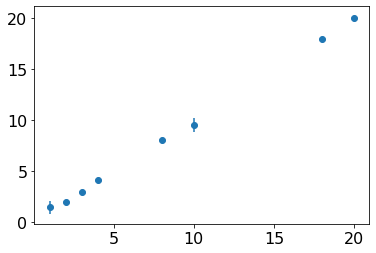

In [50]:
plt.errorbar(x_[:,0], y_[:,0], yerr=stds_, fmt='o', linestyle='')

In [51]:
impute_std

0.15414927829866734

In [52]:
stds_vals

array([0.63215346, 0.63215346, 0.15414928, 0.15414928, 0.03394113,
       0.03394113, 0.65902352, 0.65902352, 0.09828784, 0.09828784,
       0.15414928, 0.15414928, 0.15414928])

In [53]:
stds_

array([0.63215346, 0.15414928, 0.03394113, 0.65902352, 0.09828784,
       0.15414928, 0.15414928, 0.15414928])

In [54]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, ConstantKernel, Matern, ExpSineSquared

# kernel = DotProduct() + WhiteKernel()
# kernel = RBF() * ConstantKernel() + ConstantKernel() +DotProduct()
kernel = Matern(length_scale=1, nu=1.5)

# this passing in duplicated values of the training data
# along with a std for each data point
gpr1 = GaussianProcessRegressor(kernel=kernel, random_state=0, alpha=stds_vals, normalize_y=True).fit(x_1[:,np.newaxis], y_1[:,np.newaxis])


# this just passing in a fixed alpha with duplicated values of the training data
gpr2 = GaussianProcessRegressor(kernel=kernel, random_state=0, alpha=impute_std, normalize_y=True).fit(x, y)


# gpr1_: this replaces the data with the sample mean and for alpha we use their sample standard deviation.
# this means this data doesn't contain any duplicates.
# for entries containing a single data point the median of stds is used

# stds_[1]=1e-6
# stds_[2]=1e-6

gpr1_ = GaussianProcessRegressor(kernel=kernel, random_state=0, alpha=stds_, normalize_y=True).fit(x_, y_)

In [55]:
plt.figure(figsize=(14, 8), dpi=200)

yhat, ystd = gpr1.predict(x_test, return_std=True)
plt.plot(x_test, yhat, '-', label='gpr1')
plt.fill_between(x_test[:,0], y1=yhat-ystd, y2=yhat+ystd, alpha=0.5)

yhat, ystd = gpr2.predict(x_test, return_std=True)
plt.plot(x_test, yhat, '-', label='gpr2')
plt.fill_between(x_test[:,0], y1=yhat-ystd, y2=yhat+ystd, alpha=0.99)

yhat, ystd = gpr1_.predict(x_test, return_std=True)
plt.plot(x_test, yhat, '-', label='gpr1_')
plt.fill_between(x_test[:,0], y1=yhat-ystd, y2=yhat+ystd, alpha=0.5)


# plt.plot(x, y, 'o', mfc='none')

plt.errorbar(x_1, y_1, yerr=stds_vals, fmt='o-', linestyle='', mfc='none', lw=3)

plt.legend()

for xl in x_1[stds_vals == impute_std]:
    plt.axvline(xl)
    
plt.plot(x_, y_, 'x')


/var/folders/mq/kw_39j7d7n39tm1hyxg3sfx40000gn/T/ipykernel_22638/1136934186.py:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(x_1, y_1, yerr=stds_vals, fmt='o-', linestyle='', mfc='none', lw=3)


In [56]:
# gpr1 and gpr2 are very different


plt.figure(figsize=(14, 8), dpi=200)

yhat, ystd = gpr1.predict(x_test, return_std=True)
plt.plot(x_test, yhat, '-', label='gpr1')
plt.fill_between(x_test[:,0], y1=yhat-ystd, y2=yhat+ystd, alpha=0.5)

yhat, ystd = gpr2.predict(x_test, return_std=True)
plt.plot(x_test, yhat, '-', label='gpr2')
plt.fill_between(x_test[:,0], y1=yhat-ystd, y2=yhat+ystd, alpha=0.7)

# yhat, ystd = gpr1_.predict(x_test, return_std=True)
# plt.plot(x_test, yhat, '-', label='gpr1_')
# plt.fill_between(x_test[:,0], y1=yhat-ystd, y2=yhat+ystd, alpha=0.5)


# plt.plot(x, y, 'o', mfc='none')

plt.errorbar(x_1, y_1, yerr=stds_vals, fmt='o-', linestyle='', mfc='none', lw=3)

plt.legend()

for xl in x_1[stds_vals == impute_std]:
    plt.axvline(xl)
    
plt.plot(x_, y_, 'x')


/var/folders/mq/kw_39j7d7n39tm1hyxg3sfx40000gn/T/ipykernel_22638/347484253.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(x_1, y_1, yerr=stds_vals, fmt='o-', linestyle='', mfc='none', lw=3)


/var/folders/mq/kw_39j7d7n39tm1hyxg3sfx40000gn/T/ipykernel_22638/899052817.py:27: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(x_[:,0], y_[:,0], yerr=stds_, fmt='o-', linestyle='', mfc='none')


<ErrorbarContainer object of 3 artists>

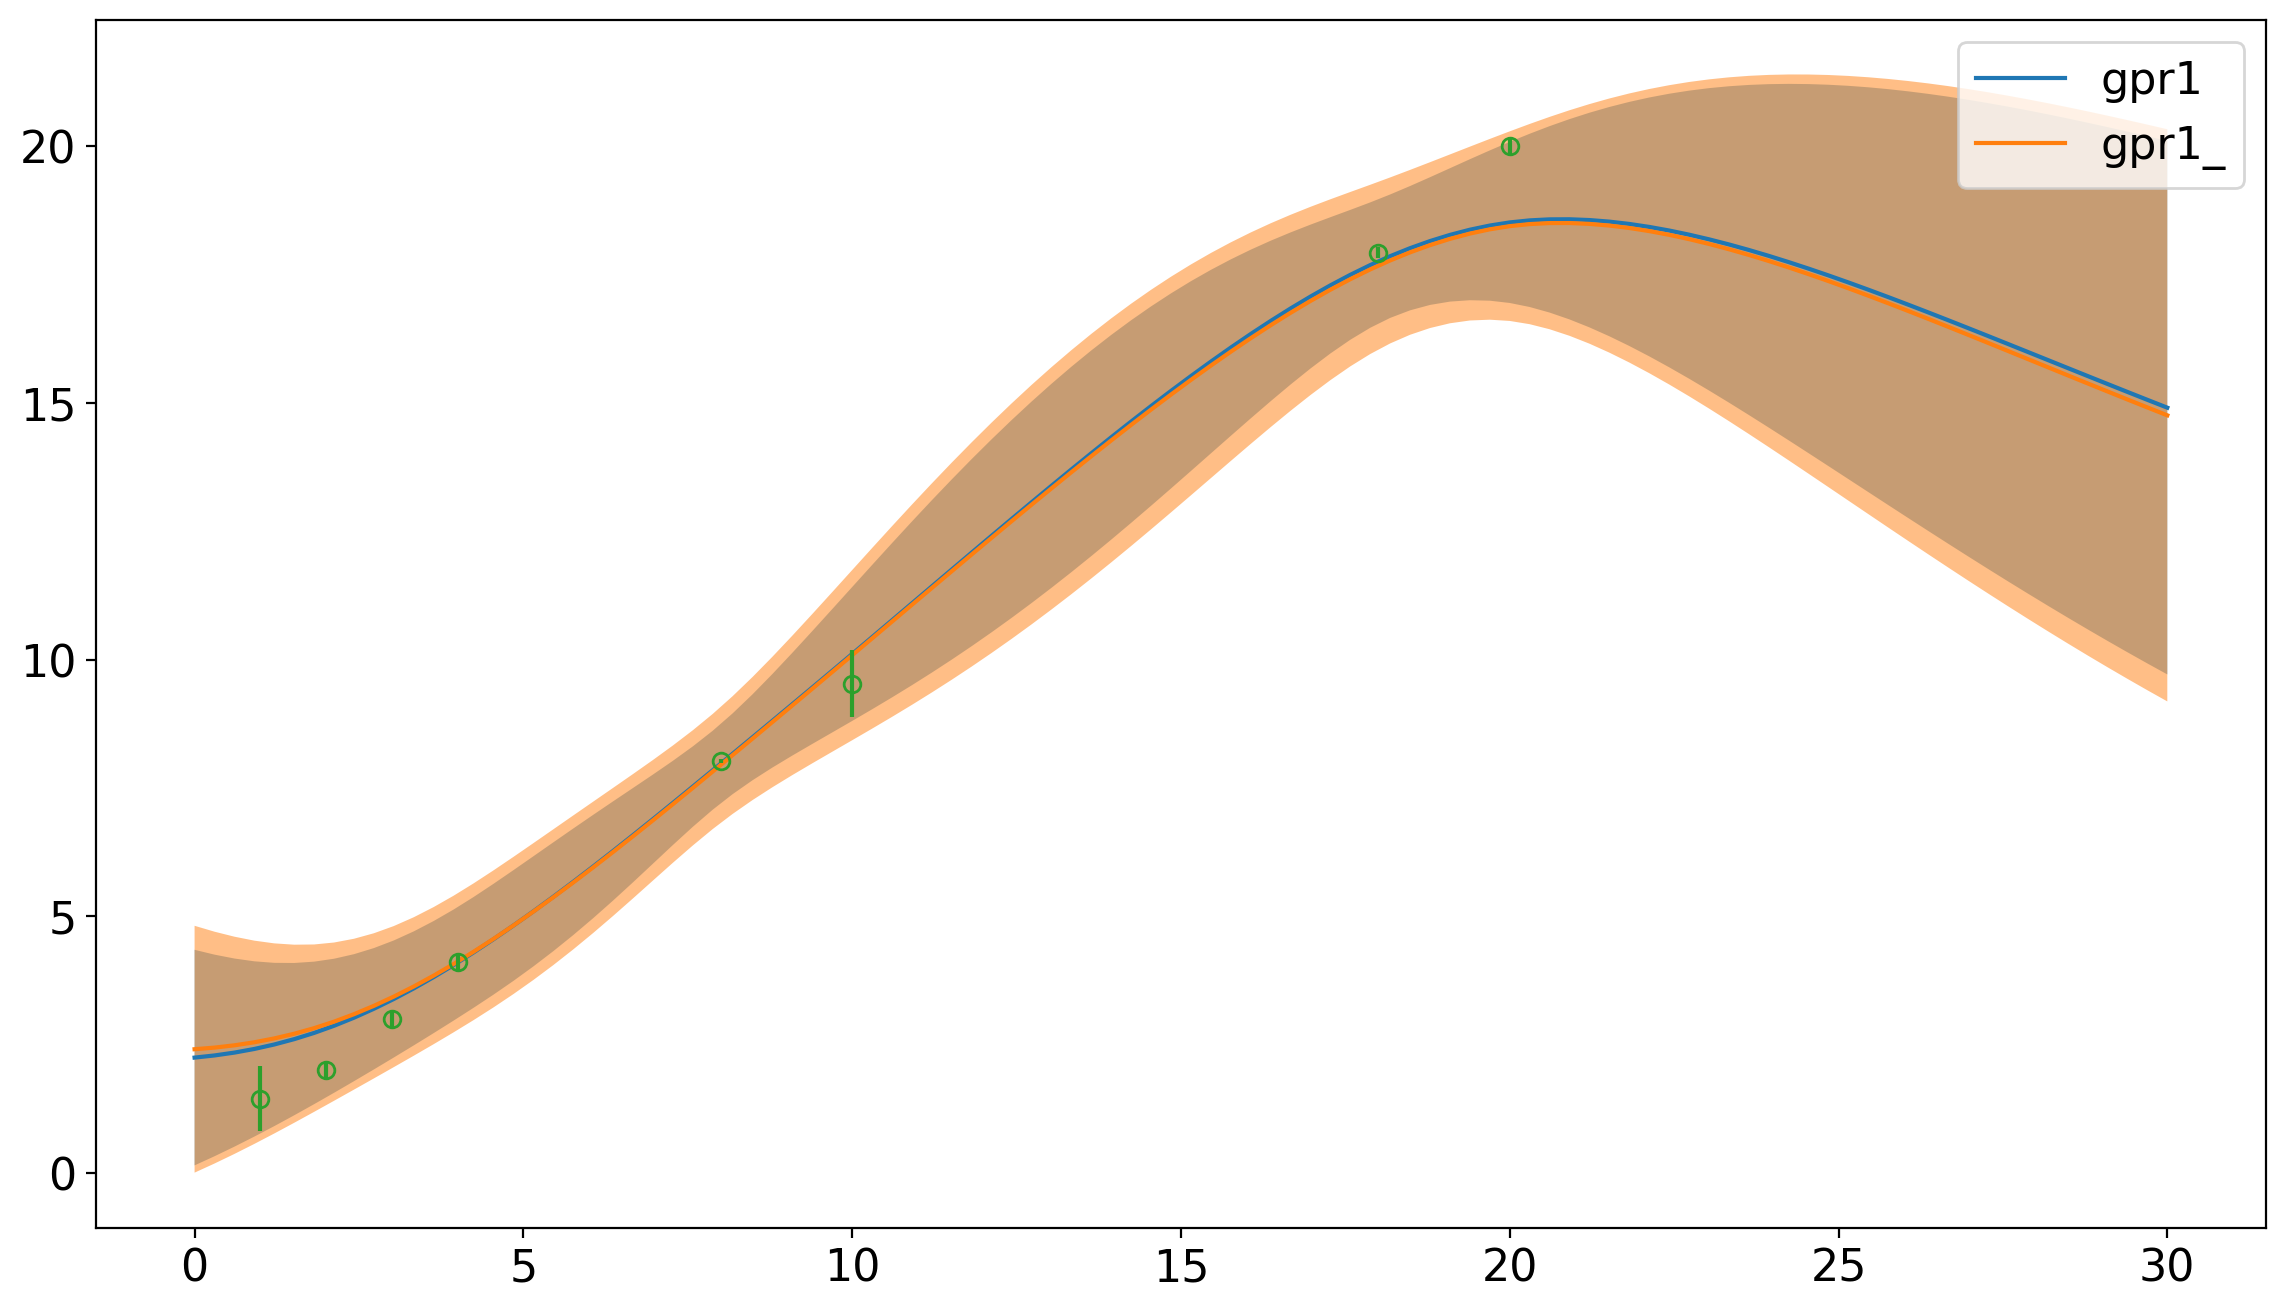

In [57]:
# gpr1 and gpr_1 give consistent results

plt.figure(figsize=(14, 8), dpi=200)

yhat, ystd = gpr1.predict(x_test, return_std=True)
plt.plot(x_test, yhat, '-', label='gpr1')
plt.fill_between(x_test[:,0], y1=yhat-ystd, y2=yhat+ystd, alpha=0.5)

# yhat, ystd = gpr2.predict(x_test, return_std=True)
# plt.plot(x_test, yhat, '-', label='gpr2')
# plt.fill_between(x_test[:,0], y1=yhat-ystd, y2=yhat+ystd, alpha=0.99)

yhat, ystd = gpr1_.predict(x_test, return_std=True)
plt.plot(x_test, yhat, '-', label='gpr1_')
plt.fill_between(x_test[:,0], y1=yhat-ystd, y2=yhat+ystd, alpha=0.5)


# plt.plot(x, y, 'o', mfc='none')

# plt.errorbar(x_1, y_1, yerr=stds_vals, fmt='o-', linestyle='', mfc='none')

plt.legend()

# for xl in x_1[stds_vals == impute_std]:
#     plt.axvline(xl)

plt.errorbar(x_[:,0], y_[:,0], yerr=stds_, fmt='o-', linestyle='', mfc='none')